<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/harmonic_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation
* Run the following cell to install the **cfclon** package
  and harmonic matrices database needed for the exercise.

In [1]:
%%capture
%pip install https://samyzaf.com/cfclon-33.zip
from cfclon import *
plt.rcParams['figure.dpi'] = 90
reg.log.state = "disabled"
dbname = "https://samyzaf.com/cfproj/aleph128a.db"
load_db(dbname)

* The following code defines the coordinates of `cage1`,
  the vertices and segments of the Hebrew letter aleph
  image.

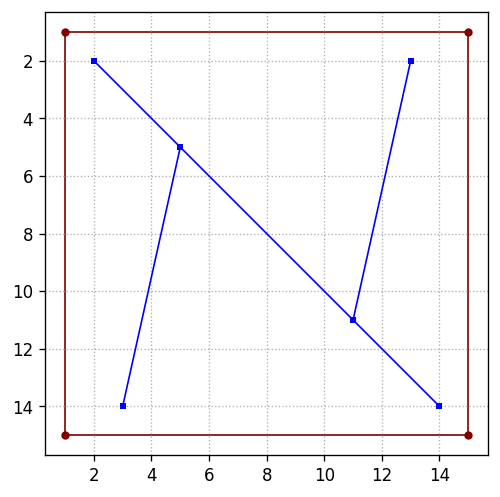

In [2]:
cage1 = [(1,1), (1,15), (15,15), (15,1)]

p1 = (2,2)
p2 = (5,5)
p3 = (11,11)
p4 = (14,14)
p5 = (13,2)
p6 = (3,14)

draw_cage(cage1)

draw_line(p1,p2)
draw_line(p2,p3)
draw_line(p3,p4)
draw_line(p2,p6)
draw_line(p3,p5)

draw_point(p1)
draw_point(p2)
draw_point(p3)
draw_point(p4)
draw_point(p5)
draw_point(p6)

show_plot()


* It is possible also to draw labels of the vertices,
  but it is not essential for this task, so we will just
  provide a picture
  
<IMG src="https://samyzaf.com/cfproj/aleph1.jpg" width=400 align="center"/>

* Now we define `cage2` and draw it.

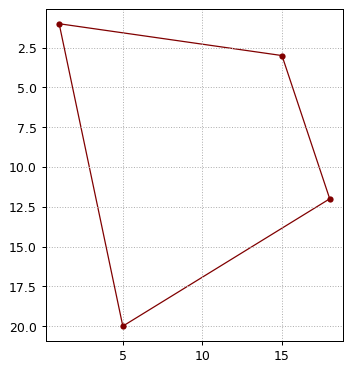

In [3]:
cage2 = [(1,1), (5,20), (18,12), (15,3)]
draw_cage(cage2)
show_plot()

* This is the solution to this exercise.
* Should not be leaked to students ... !

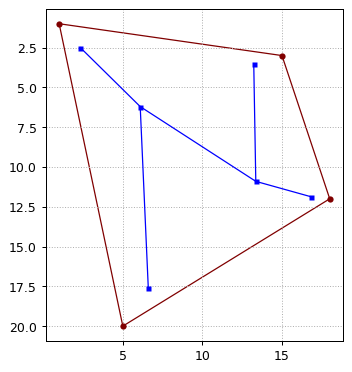

In [4]:
draw_cage(cage2)

coords1 = harmonic_coordinates(p1)
coords2 = harmonic_coordinates(p2)
coords3 = harmonic_coordinates(p3)
coords4 = harmonic_coordinates(p4)
coords5 = harmonic_coordinates(p5)
coords6 = harmonic_coordinates(p6)

q1 = clone(coords1, cage2)
q2 = clone(coords2, cage2)
q3 = clone(coords3, cage2)
q4 = clone(coords4, cage2)
q5 = clone(coords5, cage2)
q6 = clone(coords6, cage2)

draw_line(q1,q2)
draw_line(q2,q3)
draw_line(q3,q4)
draw_line(q2,q6)
draw_line(q3,q5)

draw_point(q1)
draw_point(q2)
draw_point(q3)
draw_point(q4)
draw_point(q5)
draw_point(q6)

show_plot()



In [5]:
print(q1)
print(q2)
print(q3)
print(q4)
print(q5)
print(q6)

(2.3290561665730216, 2.4979773745810507)
(6.092946599371665, 6.206047341788796)
(13.354768824354071, 10.903450867078314)
(16.846034429305337, 11.876935470761904)
(13.226683491984994, 3.503132444112018)
(6.599671636690067, 17.58772847370779)


* Just for clarity we present the cloned image with
  the original labels (the points $p_i$ of course
  have changed to $q_i$, but we use them here as
  labels only).
  
<IMG src="https://samyzaf.com/cfproj/aleph3.jpg" width=400 align="center"/>

%%HTML
<div dir=rtl style="font-size:x-large; font-weight:bold;">
הערה: בכדי למנוע העתקות, אפשר לייצר את הכלוב השני $\mathbf{cage}_2$ באמצעות פונקציה שמקבלת את מספר תעודת הזהות של התלמיד, ולכן כל תלמיד יקבל כלוב שונה. בהנחה שיש בידינו את מספרי הזהות של התלמיד, נוכל, בשלב הבדיקה, לחשב את הכלוב שקיבל בכדי לבדוק את התשובה שלו.
</div>

[(1.1, 1.0), (5.1, 20.2), (18.0, 12.1), (15.0, 3.2)]


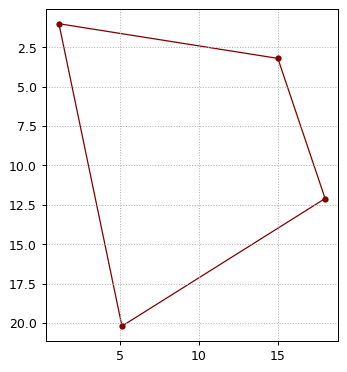

In [6]:
id = "03123456"
cage2 = get_your_cage(id)
print(cage2)
draw_cage(cage2)
show_plot()

%%HTML
<div dir=rtl>
<UL>
<LI> זה הפתרון שהתלמיד צריך להגיש
<LI> לצוות ההוראה בלבד !
</UL>
</div>

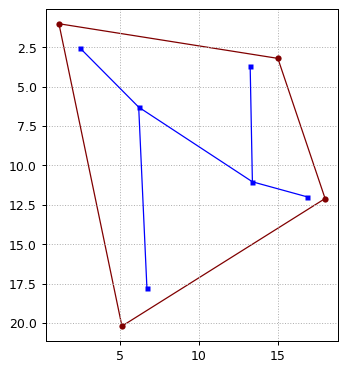

In [7]:
draw_cage(cage2)

coords1 = harmonic_coordinates(p1)
coords2 = harmonic_coordinates(p2)
coords3 = harmonic_coordinates(p3)
coords4 = harmonic_coordinates(p4)
coords5 = harmonic_coordinates(p5)
coords6 = harmonic_coordinates(p6)

q1 = clone(coords1, cage2)
q2 = clone(coords2, cage2)
q3 = clone(coords3, cage2)
q4 = clone(coords4, cage2)
q5 = clone(coords5, cage2)
q6 = clone(coords6, cage2)

draw_line(q1,q2)
draw_line(q2,q3)
draw_line(q3,q4)
draw_line(q2,q6)
draw_line(q3,q5)

draw_point(q1)
draw_point(q2)
draw_point(q3)
draw_point(q4)
draw_point(q5)
draw_point(q6)

show_plot()

In [8]:
print(q1)
print(q2)
print(q3)
print(q4)
print(q5)
print(q6)

(2.4216394062318116, 2.525858246779838)
(6.164189296391115, 6.296088034503461)
(13.38329403863251, 11.036163422591276)
(16.853214640869204, 11.989758106015149)
(13.241047813513118, 3.67016248673467)
(6.685239436043046, 17.762123429035356)
